# Ch02. 결정트리

+ 결정트리 소개
+ 결정트리 알고리즘
+ 분산과 편향
+ 결정 트리 하이퍼파라미터 튜닝
+ 심장 질환 예측하기

+ sklearn 공식문서
    + tree전체 : https://scikit-learn.org/stable/modules/tree.html
    + classifier tree : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    + regressor tree : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

## 2.1.결정트리 소개

XGBoost는 앙상블방법 중의 하나

앙상블을 구성하는 개별 모델을 XGBoost에서는 **기본학습기(base learner)** 라고 함

XGBoost의 기본 학습기로 가장 널리 사용되는 것이 결정트리

**결정트리**는 과적합되기 쉬우므로, 분산과 편향을 다루며 이 문제를 살펴 볼 것

과적합을 막는 방법은
1. 하이퍼 파라미터 튜닝
2. 여러 트리의 예측을 모으는 것 (RF와 XGBoost)


## 2.2. 결정트리 알고리즘

결정트리는 **가지(branch)** 분할을 통해 데이터를 두 개의 **노드(node)** 로 나눕니다. 가지 분할은 예측을 만드는 **리프 노드(leaf node)** 까지 계속됩니다.

### 2.2.1. 첫번째 결정트리 모델
1장에서 본 인구 조사 데이터 셋을 이용해서, 소득이 5만 달러 이상인지 예측하는 결정트리 생성

In [1]:
import pandas as pd
import numpy as np

# 경고를 끕니다.
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 1. 데이터 준비
df_census = pd.read_csv('census_cleaned.csv')

# 데이터를 X와 y로 나눕니다.
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 2. 모델적합
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 분류 모델을 만듭니다.
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 만듭니다.
y_pred = clf.predict(X_test)

# 정확도를 계산합니다.
accuracy_score(y_pred, y_test)

0.823731728288908

### 2.2.2. 결정트리의 작동원리
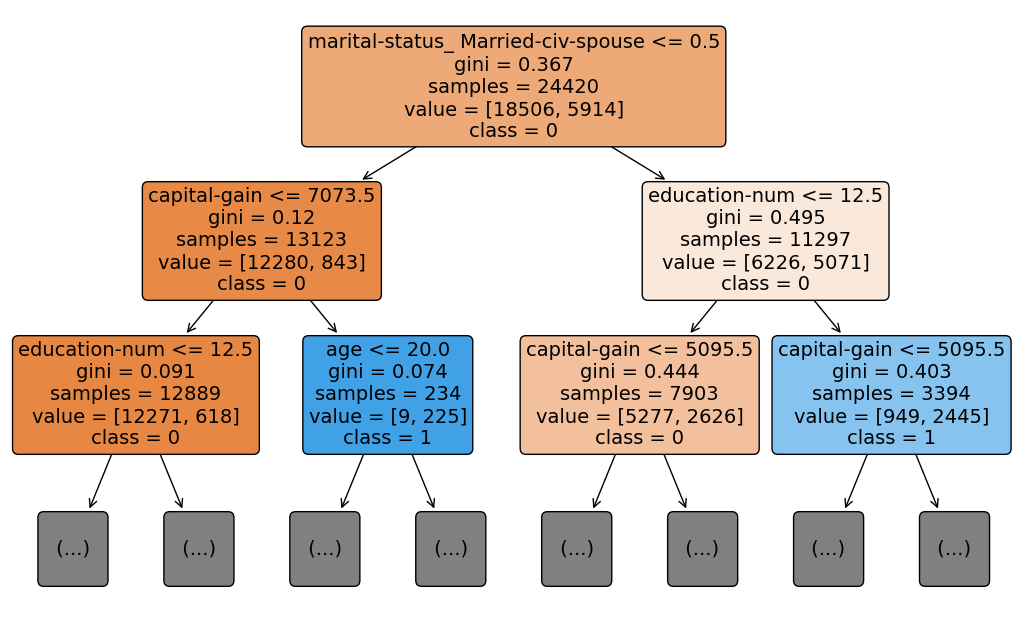

위의 내용 해석

**루트노드**

+ 첫 노드인 루트노드는 현재 결혼 유무에 따라서 분할을 하였음
+ 왼쪽이 결혼을 안한 True로 0값, 오른쪽이 결혼을 한 True로 1임


**지니불순도**

+ $ gini = 1 - \sum_{i=1}^c(p_i)^2$ , $p_i$는 전체 샘플에서 해당 클래스 샘플의 비율, c는 총 클래스 개수 

+ 불순도 값이 가장 낮은 분할을 찾는 것이 트리의 목표
+ 루트노드의 gini=0.367
+ gini값이 0이면 하나의 클래스로만 이루어진 노드가 됨
+ gini값이 0.5이면 클래스 간 샘플 개수가 동일함


**samples**
+ sample 수

**value**
+ 현재 노드에서 y값이 0인 개수와 y값이 1인 개수를 각각 나타냄

**class**
+ 현재 노드의 다수 클래스가 무엇인지 나타냄


**리프노드**
+ 트리의 끝에 있는 노드
+ 리프노드에서 최종 예측이 결정되고, 다수인 클래스가 예측 클래스가 됨


**분할방식**
+ 왼쪽이 True, 오른쪽이 False 노드로 분류됨

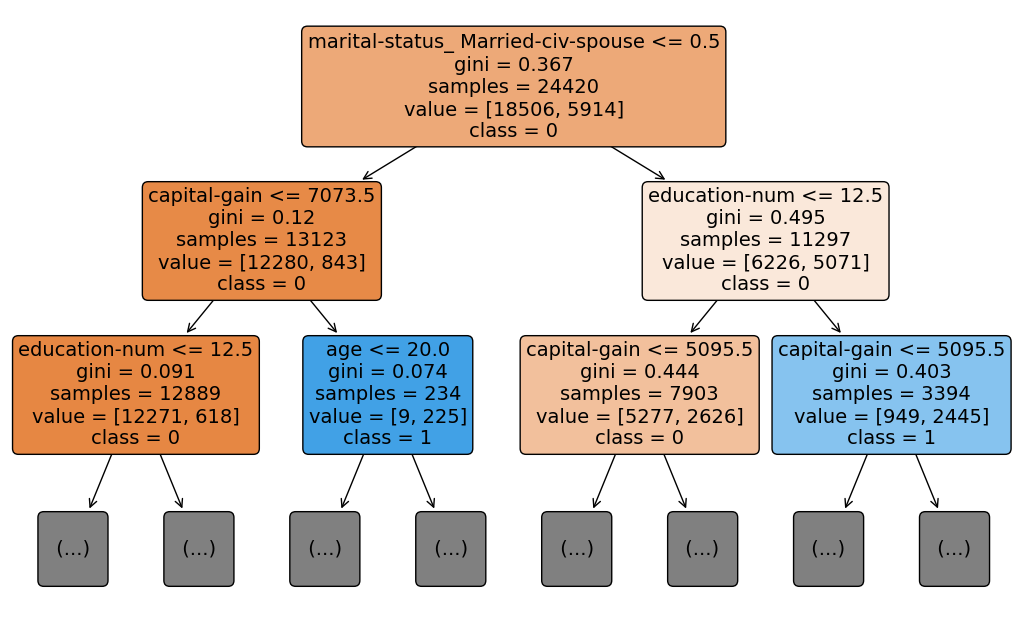

In [8]:
# 트리플랏 코드
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(13,8))
plot_tree(clf, max_depth=2, feature_names=list(X.columns), class_names=['0','1'], filled=True, rounded=True, fontsize=14)
plt.show()

## 2.3. 분산과편향

**분산**
+ 분산이란 다른 훈련 데이터가 주어졌을 때, 모델이 얼마나 변화하는지를 나타냄
+ 분산이 큰 모델은 과적합되기 쉬움
+ 분산이 낮은 모델은 training data가 달라져도 모델이 크게 달라지지 않음

**편향**
+ 편향이란 모델이 학습 데이터의 본질적인 패턴과 구조를 적절하게 파악하지 못하고, 일관되게 잘못된 가정을 하는 경향을 의미
+ 편향이 큰 모델은 과소적합되기 쉬움
+ 편향이 낮은 것은 오차가 크지 않다는 것


**편향-분산 trade off**
+ 모델의 복잡성이 증가하면 편향은 감소하지만 분산은 증가하며,반대로 모델의 복잡성이 감소하면 편향은 증가하고 분산은 감소


## 2.4. 결정트리파라미터튜닝

### 2.4.1.결정트리회귀모델

In [4]:
# 1. 데이터 가져오기
import pandas as pd
from sklearn.model_selection import train_test_split
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# 데이터를 X와 y로 나눕니다.
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [8]:
# 2. 모델 적합 & validation score 확인
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# DecisionTreeRegressor 객체를 만듭니다.
reg = DecisionTreeRegressor(random_state=2)

# 평균 제곱 오차로 교차 검증 점수를 계산합니다.
scores = cross_val_score(reg, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=5)

# 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# 평균을 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))
print('1장의 XGBoost와 선형회귀로 얻은 RMSE보다 큼... 과적합 때문인지 파악해보자')

RMSE 평균: 1233.36
1장의 XGBoost와 선형회귀로 얻은 RMSE보다 큼... 과적합 때문인지 파악해보자


In [10]:
# 3. 위의 RMSE값이 큰 이유가 과적합 때문인지 확인하기 위해, 전체 데이터 적합 후 RMSE 계산해서 확인
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
print(reg_rmse)
print('훈련데이터에 대한 rmse가 0이다. 과적합이 존재한다.')

0.0
훈련데이터에 대한 rmse가 0이다. 과적합이 존재한다.


**max_depth**
+ `DecisionTreeRegressor()`의 `max_depth=None` 인 경우, 리프노드가 순수노드가 될 때까지 트리가 성장됨.

+ 회귀모델의 타깃은 임의의 실수이기 때문에 리프노드가 순수노드가 될 때까지 성장한다면, 대부분 리프노드에 샘플이 1개씩만 들어가게 되어 과적합이 발생하게 됨

**리프노드의 샘플개수 확인**
+ `.tree_` 속성에 훈련된 트리 객체가 저장되어 있음
+ 트리 객체의 
    + `.node_count` :  트리 전체 노드 개수
    + `.n_nodes_smples` : 각 노드에 포함된 샘플 개수
    + `.children_left`, `.children_right` : 자식 노드의 인덱스를 담고 있음, 2개 다 -1이면 리프노드

In [11]:
leaf_node_count = 0
tree = reg.tree_
for i in range(tree.node_count):
    if (tree.children_left[i] == -1) and (tree.children_right[i] == -1):
        leaf_node_count += 1
        if tree.n_node_samples[i] > 1:
            print('노드 인덱스:', i, ', 샘플 개수:', tree.n_node_samples[i])
print('전체 리프 노드 개수:', leaf_node_count)

노드 인덱스: 124 , 샘플 개수: 2
전체 리프 노드 개수: 547


In [16]:
tree = reg.tree_
print('트리 객체 : ', tree)
print('트리 노드 개수 : ',tree.node_count)
print('각 노드에 포함된 트리 개수 :', tree.n_node_samples)
print('각 좌측노드의 인덱스 :', tree.children_left) 
print('각 우측노드의 인덱스 :', tree.children_right) 


트리 객체 :  <sklearn.tree._tree.Tree object at 0x0000013EFC25C6C0>
트리 노드 개수 :  1093
각 노드에 포함된 트리 개수 : [548 327 183 ...   1   1   1]
각 좌측노드의 인덱스 : [ 1  2  3 ... -1 -1 -1]
각 우측노드의 인덱스 : [652 365 150 ...  -1  -1  -1]


### 2.4.2.하이퍼파라미터
+ sklearn Regressor 트리 문서 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

#### tips
+ 일반적으로 **max**이름을 가진 매개변수를 감소시키고, **min**이름을 가진 매개변수를 증가시키면 분산을 줄이고 과적합을 방지함


#### 주로 사용되는 하이퍼파라미터
+ max_depth, max_features, min_samples_leaf, max_leaf_nodes, min_impurity_decrease, min_samples_split

#### GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

# max_depth 매개변수를 선택
params = {'max_depth':[None,2,3,4,6,8,10,20]}  # None의 경우 리프노드가 순수노드가 될 때까지 성장

# 회귀 모델을 생성
reg = DecisionTreeRegressor(random_state=2)

# GridSearchCV 객체를 초기화
grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', 
                        cv=5, return_train_score=True, n_jobs=-1)

# X_train와 y_train로 그리드 서치를 수행
grid_reg.fit(X_train, y_train)


# 최상의 매개변수를 추출
best_params = grid_reg.best_params_
print("최상의 매개변수:", best_params)


# 최상의 점수를 계산
best_score = np.sqrt(-grid_reg.best_score_)
print("훈련 점수: {:.3f}".format(best_score))

최상의 매개변수: {'max_depth': 6}
훈련 점수: 951.398


In [18]:
# 최상의 모델을 추출합니다.
best_model = grid_reg.best_estimator_

# 테스트 세트에서 예측을 만듭니다.
y_pred = best_model.predict(X_test)

# mean_squared_error를 임포트합니다.
from sklearn.metrics import mean_squared_error

# 테스트 세트의 제곱근 오차를 계산합니다.
rmse_test = mean_squared_error(y_test, y_pred)**0.5

# 테스트 세트 점수를 출력합니다.
print('테스트 점수: {:.3f}'.format(rmse_test))

테스트 점수: 864.670


#### min_sample_leaf
+ 리프 노드가 가질 수 있는 최소 샘플의 개수를 제한함
+ 과적합 방지

In [19]:
# grid_search 함수를 만듭니다.
def grid_search(params, reg=DecisionTreeRegressor(random_state=42)):
    # GridSearchCV 객체를 만듭니다.
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    # X_train와 y_train에서 그리드 서치를 수행합니다.
    grid_reg.fit(X_train, y_train)

    # 최상의 매개변수를 추출합니다.
    best_params = grid_reg.best_params_
    print("최상의 매개변수:", best_params)
    
    # 최상의 점수를 계산합니다.
    best_score = np.sqrt(-grid_reg.best_score_)
    print("훈련 점수: {:.3f}".format(best_score))

    # 테스트 세트에 대한 예측을 만듭니다.
    y_pred = grid_reg.predict(X_test)

    # 평균 제곱근 오차를 계산합니다.
    rmse_test = mean_squared_error(y_test, y_pred)**0.5
    print('테스트 점수: {:.3f}'.format(rmse_test))

In [21]:
print(X_train.shape)
print(f'데이터의 개수가 {X_train.shape[0]}개 임을 고려해서, min_samples_leaf의 grid search parameter를 조절해보자')

(548, 12)
데이터의 개수가 548개 임을 고려해서, min_samples_leaf의 grid search parameter를 조절해보자


In [22]:
grid_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30]})

최상의 매개변수: {'min_samples_leaf': 8}
훈련 점수: 898.373
테스트 점수: 855.620


In [23]:
grid_search(params={'max_depth':[None,2,3,4,6,8,10,20],'min_samples_leaf':[1,2,4,6,8,10,20,30]})

최상의 매개변수: {'max_depth': 6, 'min_samples_leaf': 2}
훈련 점수: 889.498
테스트 점수: 918.095


In [26]:
grid_search(params={'max_depth':[None,4,5,6,7,8,9],'min_samples_leaf':[2,3,4,5,7,8,9]})

최상의 매개변수: {'max_depth': 9, 'min_samples_leaf': 7}
훈련 점수: 886.263
테스트 점수: 877.096


#### max_leaf_nodes
+ 리프 노드가 가질 수 있는 최대 샘플의 개수를 제한함

#### max_features
+ 모델의 분산을 줄이는 데 효과적인 매개변수 (분할을 제한함)
+ 분할마다 모든 특성을 고려하지 않고, 매번 지정된 개수의 특성 중에서 선택
+ 옵션 설명
    + None , 'auto' : 전체특성 사용
    + 'sqrt` : 전체 특성 개수의 제곱근을 사용  (DecisionTreeClassifier의 경우 'auto' == 'sqrt')
    + 'log2' : 전체 특성 개수의 로그를 사용

#### min_samples_split
+ 분할하기 위해 필요한 최소 샘플 개수를 제한함
+ default = 2
+ 5로 설정하면, 5개 보다 적은 노드는 더이상 분할되지 않음

#### splitter
+ 노드를 분할하기 위한 **특성 선택 방법**
+ 옵션
    + 'best' : **정보이득**이 가장 큰 특성을 선택
    + 'random' : 랜덤하게 노드를 분할
+ 'random'을 선택하면 과적합을 막고, 다양한 트리 생성 가능

#### criterion
+ 분할 품질을 측정하는 메저를 정함
    + criterion이 가장 좋은 분할을 선택해서 분할하게 됨

+ 회귀모델
    + 'squared_error(default)', 'friedman_mse', 'absolute_error', 'poisson'
+ 분류모델
    + 'gini(default)', 'entropy' : 보통 둘 다 비슷한 결과 나옴

#### min_impurity_decrease
+ 분할하기 위한 최소 불순도 감소를 지정
+ default = 0

#### min_weight_fraction_leaf
+ 리프 노드가 되기 위한 전체 가중치의 최소 비율(`sample_weight`설정을 따로 하지 않으면 그냥 sample의 개수 비율이 됨)
    + 샘플이 500개이고, 이 매개변수를 0.01로 지정하면, 리프 노드가 되기 위한 최소 샘플 개수는 5개
    + `.fit()` 에서 `sample_weight` 매개변수를 지정하지 않으면, 샘플은 모두 동일한 가중치를 가짐
+ **분산을 줄이고 과적합을 막을 수 있음**
+ default = 0


#### ccp_alpha
+ 트리를 만든 이후에 가지치기하는 기능
+ default = 0으로 가지치기 실행하지 않음
+ 0보다 크면, 최대 ccp_alpha의 비용복잡도를 가진 부분 트리를 선택
+ 공식문서 참고 : https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

## 2.5. 심장질환예측하기 - 사례연구